<a href="https://colab.research.google.com/github/bogicho/flyAI_ML/blob/main/RNN3_4_ex_LSTM%E1%84%80%E1%85%AA_CNN%E1%84%8B%E1%85%B4_%E1%84%8C%E1%85%A9%E1%84%92%E1%85%A1%E1%86%B8%E1%84%8B%E1%85%B3%E1%86%AF_%E1%84%8B%E1%85%B5%E1%84%8B%E1%85%AD%E1%86%BC%E1%84%92%E1%85%A1%E1%86%AB_%E1%84%8B%E1%85%A7%E1%86%BC%E1%84%92%E1%85%AA_%E1%84%85%E1%85%B5%E1%84%87%E1%85%B2_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
#단어수 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [ ]:
#모델 구조 설정
model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 500)         2500000   
                                                                 
 dropout (Dropout)           (None, None, 500)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          160064    
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56        
                                                        

In [ ]:
#모델 실행 옵션
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#학습 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
#모델 실행
history = model.fit(X_train, y_train, batch_size=40, epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 77s 139ms/step - loss: 0.3805 - accuracy: 0.8234 - val_loss: 0.2684 - val_accuracy: 0.8933
Epoch 2/100
469/469 [==============================] - 27s 57ms/step - loss: 0.2217 - accuracy: 0.9147 - val_loss: 0.3016 - val_accuracy: 0.8763
Epoch 3/100
469/469 [==============================] - 17s 36ms/step - loss: 0.1574 - accuracy: 0.9441 - val_loss: 0.2757 - val_accuracy: 0.8965
Epoch 4/100
469/469 [==============================] - 13s 27ms/step - loss: 0.1068 - accuracy: 0.9645 - val_loss: 0.3170 - val_accuracy: 0.8784
Epoch 5/100
469/469 [==============================] - 11s 23ms/step - loss: 0.0737 - accuracy: 0.9764 - val_loss: 0.3562 - val_accuracy: 0.8822
Epoch 6/100
469/469 [==============================] - 8s 17ms/step - loss: 0.0495 - accuracy: 0.9835 - val_loss: 0.4568 - val_accuracy: 0.8822


## 결과 시각화

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
  plt.legend()
plt.show()

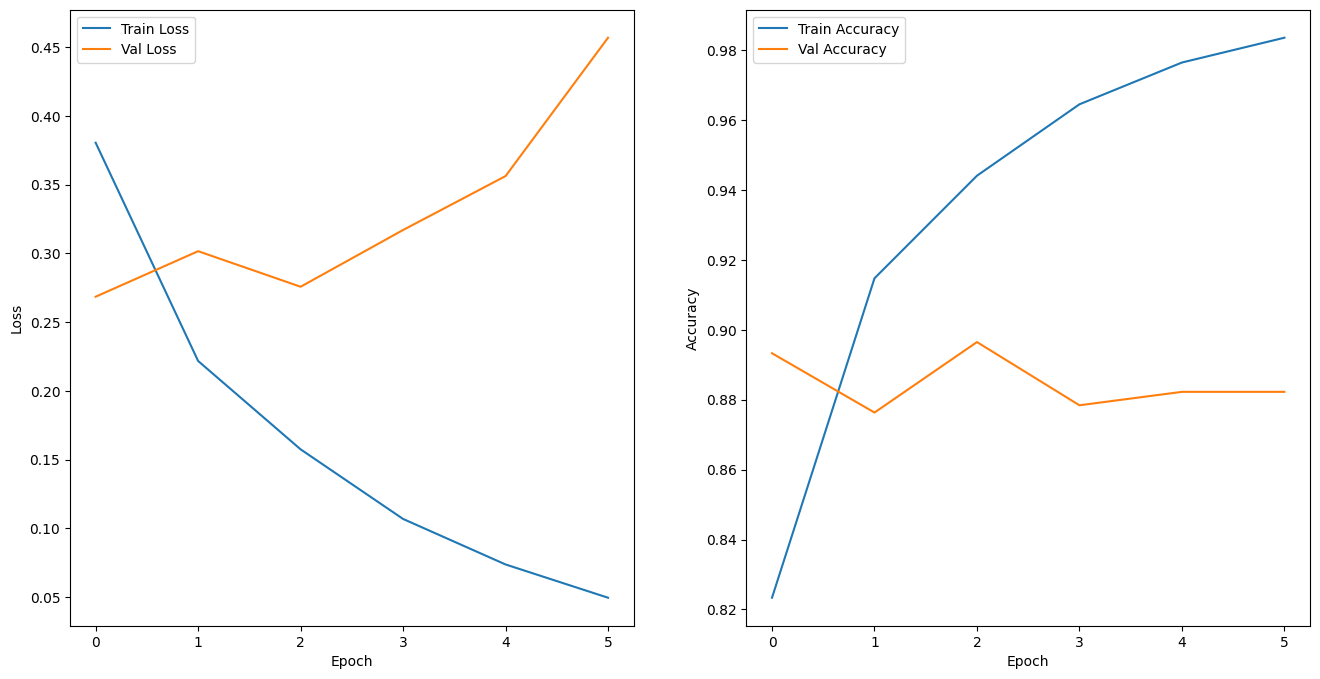

In [ ]:
plot_history(history)